In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
veri = pd.read_csv("train.csv")

In [37]:
veri.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
veri.shape

(42000, 785)

In [39]:
from keras.datasets import mnist

In [40]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [41]:
x, y = veri.drop(["label"], axis = 1).values, veri["label"]
x.shape


(42000, 784)

In [42]:
y.shape

(42000,)

In [43]:
veri.shape

(42000, 785)

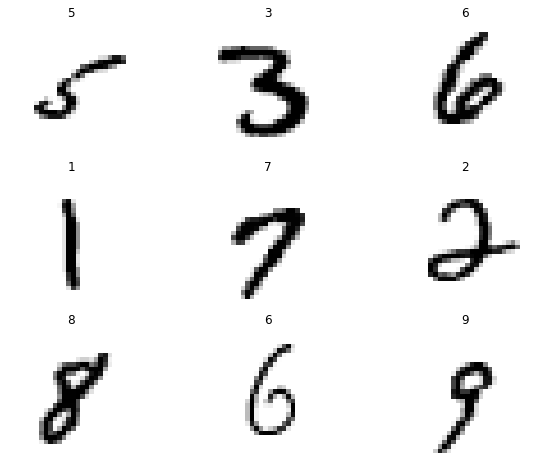

In [44]:
plt.figure(figsize=(10,8))
for i in np.arange(1,10):
    plt.subplot(int("33" + str(i)))
    plt.imshow(xtrain[i+10].reshape(28,28), cmap=plt.cm.binary)
    plt.title(ytrain[i+10])
    plt.axis("off")
plt.show()

In [45]:
num_train = 38000
xtrain, xtest, ytrain, ytest = x[:num_train], x[num_train:], y[:num_train], y[num_train:]

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [47]:
xtest.shape

(4000, 784)

In [48]:
tahmin = knn.predict(xtest)
print(tahmin)

[5 7 5 ... 7 6 9]


In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, tahmin)

0.969

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, tahmin)

array([[428,   0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  0, 442,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   3, 353,   1,   0,   0,   0,  11,   0,   1],
       [  1,   0,   2, 411,   0,   4,   0,   1,   1,   1],
       [  0,   3,   0,   0, 409,   0,   2,   0,   1,   7],
       [  1,   1,   0,   3,   0, 320,   4,   0,   2,   3],
       [  0,   0,   0,   0,   1,   1, 398,   0,   0,   0],
       [  0,   3,   2,   0,   1,   0,   0, 390,   0,   5],
       [  2,  16,   1,   5,   2,   5,   0,   1, 343,   4],
       [  1,   1,   2,   1,   4,   2,   0,   5,   1, 382]], dtype=int64)

In [51]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
from keras.models import Sequential
from keras.layers import Dense

In [52]:
model = Sequential()

model.add(Dense(10, activation = "relu", input_shape=(xtrain.shape[1],)))
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(loss="categorical_crossentropy",optimizer= "adam", metrics=["accuracy"])

In [53]:
model.fit(xtrain, ytrain, epochs=200, verbose=2)

Epoch 1/200
1188/1188 - 1s - loss: 1.8660 - accuracy: 0.3015
Epoch 2/200
1188/1188 - 1s - loss: 1.2522 - accuracy: 0.5144
Epoch 3/200
1188/1188 - 1s - loss: 0.8642 - accuracy: 0.7042
Epoch 4/200
1188/1188 - 1s - loss: 0.7243 - accuracy: 0.7517
Epoch 5/200
1188/1188 - 1s - loss: 0.6664 - accuracy: 0.7734
Epoch 6/200
1188/1188 - 1s - loss: 0.6226 - accuracy: 0.7909
Epoch 7/200
1188/1188 - 1s - loss: 0.5830 - accuracy: 0.8063
Epoch 8/200
1188/1188 - 1s - loss: 0.5458 - accuracy: 0.8224
Epoch 9/200
1188/1188 - 1s - loss: 0.5201 - accuracy: 0.8365
Epoch 10/200
1188/1188 - 1s - loss: 0.4999 - accuracy: 0.8426
Epoch 11/200
1188/1188 - 1s - loss: 0.4887 - accuracy: 0.8481
Epoch 12/200
1188/1188 - 1s - loss: 0.4777 - accuracy: 0.8504
Epoch 13/200
1188/1188 - 1s - loss: 0.4573 - accuracy: 0.8548
Epoch 14/200
1188/1188 - 1s - loss: 0.4496 - accuracy: 0.8598
Epoch 15/200
1188/1188 - 1s - loss: 0.4462 - accuracy: 0.8621
Epoch 16/200
1188/1188 - 1s - loss: 0.4356 - accuracy: 0.8659
Epoch 17/200
1188

Epoch 133/200
1188/1188 - 1s - loss: 0.2962 - accuracy: 0.9108
Epoch 134/200
1188/1188 - 1s - loss: 0.2970 - accuracy: 0.9111
Epoch 135/200
1188/1188 - 1s - loss: 0.2995 - accuracy: 0.9102
Epoch 136/200
1188/1188 - 1s - loss: 0.2996 - accuracy: 0.9092
Epoch 137/200
1188/1188 - 1s - loss: 0.2994 - accuracy: 0.9100
Epoch 138/200
1188/1188 - 1s - loss: 0.2962 - accuracy: 0.9105
Epoch 139/200
1188/1188 - 1s - loss: 0.2994 - accuracy: 0.9098
Epoch 140/200
1188/1188 - 1s - loss: 0.3000 - accuracy: 0.9105
Epoch 141/200
1188/1188 - 1s - loss: 0.2961 - accuracy: 0.9098
Epoch 142/200
1188/1188 - 1s - loss: 0.2990 - accuracy: 0.9100
Epoch 143/200
1188/1188 - 1s - loss: 0.2949 - accuracy: 0.9112
Epoch 144/200
1188/1188 - 1s - loss: 0.2971 - accuracy: 0.9100
Epoch 145/200
1188/1188 - 1s - loss: 0.2967 - accuracy: 0.9099
Epoch 146/200
1188/1188 - 1s - loss: 0.2954 - accuracy: 0.9107
Epoch 147/200
1188/1188 - 1s - loss: 0.2998 - accuracy: 0.9103
Epoch 148/200
1188/1188 - 1s - loss: 0.3005 - accuracy:

In [54]:
ytest = to_categorical(ytest)
model.evaluate(xtest, ytest)

125/125 [==============================] - 0s 727us/step - loss: 0.3905 - accuracy: 0.8942


[0.39049071073532104, 0.8942499756813049]